<a href="https://colab.research.google.com/github/jidemobell/lyit_bd_prj2/blob/main/L00163373_PROJECT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Warning*: Distribution/sharing of this notebook and other lab notebooks on the internet and other sources is strictly prohibited. You should not provide this notebook to anyone else. you should just use it for the purpose of this assessment only.

You should attempt and submit your work. you can refer to sources/APIs to complete this taks. Copying from each other even a part or so is strictly prohibited and may result in serious action.


# Assessment 5 : Big Data Analytics using Machine Learning
## Due Feburary 25th, 5pm (Firm)
### Total points: 100 ( weighted over 35)

This assessmet will enable you achieve essential experience of machine learning using sklearn and scalable approach to machine learning based on park ML! 

The focus of this assessment is to explore what makes videos popular on various platforms, e.g., Netflix and YouTube. The assessment will focus on YouTube 's data.

**PLEASE NOTE** There can be multiple solutions possible for this assessment. various students will end up implementing different solutions. Therefore, there is not a single solution to fit all students.

### Required Libraries 
Setup the libraries using the following cells. You should select Java 8 when prompted.

In [2]:
! sudo apt install openjdk-8-jdk
! sudo update-alternatives --config java

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk-headless openjdk-8-jre
  openjdk-8-jre-headless x11-utils
Suggested packages:
  gvfs openjdk-8-demo openjdk-8-source visualvm icedtea-8-plugin libnss-mdns
  fonts-ipafont-gothic fonts-ipafont-mincho fonts-wqy-microhei
  fonts-wqy-zenhei fonts-indic mesa-utils
The following NEW packages will be installed:
  fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libgail-common libgail18 libgtk2.0-0 libgtk2.0-bin
  libgtk2.0-common libxxf86dga1 openjdk-8-jdk openjdk-8-jdk-headless
  openjdk-8-jre op

In [3]:
!pip3 install pandas==1.0.5
!pip3 install pyspark

     |████████████████████████████████| 10.1 MB 5.2 MB/s 
  Attempting uninstall: pandas
    Found existing installation: pandas 1.3.5
    Uninstalling pandas-1.3.5:
      Successfully uninstalled pandas-1.3.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas>=1.1.0; python_version >= "3.0", but you have pandas 1.0.5 which is incompatible.


     |████████████████████████████████| 281.4 MB 34 kB/s 
     |████████████████████████████████| 198 kB 46.8 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=19bf85a734f79954d09edbe53240d8268c9dff4202a1f8d63a1b2fa182016c1a
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [1]:
# if restart of runtime is successful, the execution of this cell should
# prints True

import pandas as pd
print(pd.__version__ == '1.0.5')

True


In [2]:
import numpy as np 
import json
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from datetime import datetime
import glob
import seaborn as sns
import re
import os
from matplotlib import pyplot
import seaborn
import random
pd.options.mode.chained_assignment = None

Import your dataset using the following cells for the Youtube videos

In [5]:
from google.colab import files
uploaded = files.upload()

# !unzip /content/youtube_data.zip


Saving youtube_data.zip to youtube_data.zip


In [3]:
!unzip /content/youtube_data.zip


Archive:  /content/youtube_data.zip
replace youtube_data/IN_category_id.json? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


# Section 5.1. : Machine Learning with Sklearn (45 points)

## 5.1.1 Data loading and Preprocessing (5 pts)

The dataset consists of a daily record of the top trending YouTube videos.

To determine the year’s top-trending videos, YouTube uses a combination of factors including measuring users interactions, e.g., number of views, shares, comments and likes. "Note that they’re not the most-viewed videos overall for the calendar year”. Top performers on the YouTube trending list are music videos (such as the famously viral “[Gangnam Style](https://www.youtube.com/watch?v=9bZkp7q19f0)”), celebrity and/or reality TV performances, and the random dude-with-a-camera viral videos that YouTube is well-known for.

This dataset includes several months (and counting) of data on daily trending YouTube videos. Data is included for numerous countries, with up to 200 listed trending videos per day.

Each region’s data is in a separate file. Data includes:

*   Video Title
*   Channel title
*   Publish time
*   Tags
*   Views
*   Likes
*   Dislikes
*   Description
*   Comment count

The data also includes a category\_id field, which varies between regions. To retrieve the categories for a specific video, find it in the associated JSON. One such file is included for each of the five regions in the dataset.

For more information on specific columns in the dataset refer to the column metadata.



#### 5.1.1.1: Combining Multiple CSV's. (2 pts.)

There are multiple csv files in the dataset, each corresponding to a specific country. As a first step you need to read them and combine these csv files into a single dataframe. Use 'video_id' as your index.

While combining them, you also need to create a column for "country" and fill it in the final dataframe. The country name can be extracted using the filename itself.

Name your dataframe "combined_data".

In [4]:
# Import all the csv files
#files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
# files = [i for i in glob.glob('/content/gdrive/MyDrive/youtube-data/*.csv'.format('csv'))]
# sorted(files)

files = [i for i in glob.glob('/content/youtube_data/*.csv'.format('csv'))]
sorted(files)

# Task: Merge all dataframes to single dataframe "combined_data" and add a 'country' column. 
all_dataframes = list()
for csv in files:
  # all_dataframes.append(pd.read_csv(csv))
  frame = pd.read_csv(csv,index_col=0)
  frame['country'] = os.path.basename(csv)
  all_dataframes.append(frame)

combined_data = pd.concat(all_dataframes)
combined_data['country']=combined_data['country'].map(lambda x: x.lstrip('+-').rstrip('videos.csv'))
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
video_id,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US


#### 5.1.1.2: Map category Id's to categories (2 pts)

Read the category_id.json file and map the category_id's in the dataframe to the category name.

Use json.load to read in the data in the json file as a python dictionary and then map the category id given in the dataframe to category name from the json file. (Hint: the US json is likely the most comprehensive reference)




In [5]:
# combined_data['category_id'] = combined_data['category_id'].astype(str)
# js_files = [i for i in glob.glob('/content/gdrive/MyDrive/youtube-data/*.json')]
# sorted(js_files)
combined_data['category_id'] = combined_data['category_id'].astype(str)
js_files = [i for i in glob.glob('/content/youtube_data/*.json')]
sorted(js_files)

id_to_category = {}
for x in js_files:
  js = pd.read_json(x)
  for category in js ["items"]:
        id_to_category[category["id"]] = category["snippet"]["title"]
combined_data["category"] = combined_data["category_id"].map(id_to_category)
# Add code here

# combined_data.insert(4, 'category', # Add code here)


combined_data.head(10)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
video_id,,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,Comedy
kJzGH0PVQHQ,17.14.11,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13T01:14:16.000Z,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,Entertainment
il_pSa5l98w,17.14.11,"MCA (Middle Class Abbayi) TEASER - Nani,Sai Pa...",Dil Raju,24,2017-11-10T04:29:50.000Z,"Nenu Local|""Nenu Local Telugu Movie""|""Nani""|""S...",6106669,98612,4185,4763,https://i.ytimg.com/vi/il_pSa5l98w/default.jpg,False,False,False,Watch MCA- Middle Class Abbayi First Look Teas...,IN,Entertainment
7MxiQ4v0EnE,17.14.11,Daang ( Full Video ) | Mankirt Aulakh | Sukh S...,Speed Records,10,2017-11-11T16:41:15.000Z,"punjabi songs|""punjabi bhangra""|""punjabi music...",5718766,127477,7134,8063,https://i.ytimg.com/vi/7MxiQ4v0EnE/default.jpg,False,False,False,Song - Daang\nSinger - Mankirt Aulakh\nFaceboo...,IN,Music
c64I9HNpiOY,17.14.11,Padmavati : Ek Dil Ek Jaan Video Song | Deepik...,T-Series,10,2017-11-11T06:14:19.000Z,"Ek Dil Ek Jaan Video Song|""'Ek Dil Ek Jaan'""|""...",10588371,132738,8812,10847,https://i.ytimg.com/vi/c64I9HNpiOY/default.jpg,False,False,False,Presenting the song 'Ek Dil Ek Jaan' from Padm...,IN,Music
KObFEYCaRx8,17.14.11,Chiranjeevi in Naga Chaitanya - Samantha Recep...,Top Telugu Media,24,2017-11-13T04:42:26.000Z,Chiranjeevi in Naga Chaitanya - Samantha Recep...,118223,520,53,23,https://i.ytimg.com/vi/KObFEYCaRx8/default.jpg,False,False,False,Chiranjeevi in Naga Chaitanya - Samantha Recep...,IN,Entertainment


In [6]:
combined_data.head(4)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
video_id,,,,,,,,,,,,,,,,,
kzwfHumJyYc,17.14.11,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12T12:20:39.000Z,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation
zUZ1z7FwLc8,17.14.11,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13T05:43:56.000Z,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics
10L1hZ9qa58,17.14.11,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12T15:48:08.000Z,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment
N1vE8iiEg64,17.14.11,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12T07:08:48.000Z,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,Comedy


#### 5.1.1.3: Fix datetime format and remove rows with NA's (1 pt)

The 'publish_time' and 'trending_date' features are not in a unix datetime format, so use pandas to_datetime() to convert it into the right format.

After that is done remove all the rows which have NA's in them.

In [7]:
# Add code here
combined_data.info()
combined_data['trending_date'] = pd.to_datetime(combined_data["trending_date"],format ="%y.%d.%m")
combined_data['publish_time'] = pd.to_datetime(combined_data["publish_time"],format = "%Y-%m-%dT%H:%M:%S.%fZ")

# Add your Code here to remove NA's
combined_data = combined_data.dropna()
combined_data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 159906 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   trending_date           159906 non-null  object
 1   title                   159906 non-null  object
 2   channel_title           159906 non-null  object
 3   category_id             159906 non-null  object
 4   publish_time            159906 non-null  object
 5   tags                    159906 non-null  object
 6   views                   159906 non-null  int64 
 7   likes                   159906 non-null  int64 
 8   dislikes                159906 non-null  int64 
 9   comment_count           159906 non-null  int64 
 10  thumbnail_link          159906 non-null  object
 11  comments_disabled       159906 non-null  bool  
 12  ratings_disabled        159906 non-null  bool  
 13  video_error_or_removed  159906 non-null  bool  
 14  description             15

In [9]:
#copied frame to be used in classification model in TASK 2
copied_pd_frame = combined_data.copy()
copied_pd_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154567 entries, kzwfHumJyYc to ooyjaVdt-jA
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trending_date           154567 non-null  datetime64[ns]
 1   title                   154567 non-null  object        
 2   channel_title           154567 non-null  object        
 3   category_id             154567 non-null  object        
 4   publish_time            154567 non-null  datetime64[ns]
 5   tags                    154567 non-null  object        
 6   views                   154567 non-null  int64         
 7   likes                   154567 non-null  int64         
 8   dislikes                154567 non-null  int64         
 9   comment_count           154567 non-null  int64         
 10  thumbnail_link          154567 non-null  object        
 11  comments_disabled       154567 non-null  bool          
 12  ratings_disabled    

In [10]:
# print
print('validate_na',(combined_data.shape))

validate_na (154567, 17)


## 5.2 Exploratory Data Analysis & Feature Engineering (20pt)


**Exploratory Data Analysis:** 
EDA aims to analyze data sets by summarizing its key characteristics assisted by visualizations. EDA communicates insights beyond formal modeling/hypothesis testing with or without statistical model.

**Feature Engineering:** 
The primary object of feature engineering is to extract features using domain knowledge. It aims to extract features from raw data using various data mining approaches.

These features are fed to various machine learning classifiers. These features are also called as covariates, predicators, or simply a new column in data frame.

#### 5.2.1: Calculating Mean, standard deviation, min and max. (1 pt)

In this section, we will focus to compute various satistics, i.e., mean, standard deviation, min and max for numerical features in the dataset and then store them into lists, i.e.,  [views, likes, dislikes, comment_count].

means = [views_mean, likes_mean, dislikes_mean, comment_count_mean] and similarly for mins, maxs and stds.

In [11]:
combined_data.describe()

,views,likes,dislikes,comment_count
count,1.545670e+05,1.545670e+05,1.545670e+05,1.545670e+05
mean,1.281578e+06,4.096105e+04,2.056138e+03,4.606594e+03
std,4.605292e+06,1.521490e+05,1.825854e+04,2.327823e+04
min,2.230000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,9.574900e+04,1.321000e+03,8.100000e+01,1.720000e+02
50%,3.134280e+05,6.336000e+03,2.980000e+02,7.650000e+02
75%,9.473390e+05,2.594050e+04,1.024000e+03,2.726000e+03
max,2.252119e+08,5.613827e+06,1.643059e+06,1.228655e+06


In [12]:

# Add your code here
maxs = combined_data.describe().iloc[7].values.tolist()
mins = combined_data.describe().iloc[3].values.tolist()
stds = combined_data.describe().iloc[2].values.tolist()
means = combined_data.describe().iloc[1].values.tolist()



In [13]:
# print here
print('check_min_max_mean_std',([maxs, mins, stds, means]))


check_min_max_mean_std [[225211923.0, 5613827.0, 1643059.0, 1228655.0], [223.0, 0.0, 0.0, 0.0], [4605292.478385801, 152148.95485475037, 18258.54137966117, 23278.22562061912], [1281578.03423758, 40961.05191276275, 2056.138490104615, 4606.593742519425]]


#### 5.2.2: Rescaling the features (1 pt)

From the above section, it is clear that the numerical values range is really high.  we can use rescaling to avoid numerical instability problems. We can rescale likes, views, dislikes, and comment_count using log scale (base e). Let us store rescaled features in dataframe as likes_log, views_log, dislikes_log and comment_log.

NOTE- log 0 is not defined, therefore, you should add 1 to each value prior to taking the log.

In [14]:
# Add your code here
combined_data['likes_log'] = np.log(1 + combined_data['likes']) 
combined_data['views_log'] = np.log(1 + combined_data['views']) 
combined_data['dislikes_log'] = np.log(1 + combined_data['dislikes']) 
combined_data['comment_log'] = np.log(1 + combined_data['comment_count']) 

In [15]:
# Print results
print('check_feature_rescaling',([np.mean(combined_data['likes_log']),np.mean(combined_data['views_log']),np.mean(combined_data['dislikes_log']),
                                         np.mean(combined_data['comment_log'])]))

check_feature_rescaling [8.571590187188683, 12.55267980501314, 5.614484952081131, 6.424543615108467]


In [19]:
# copied data to be used for later task
old_combined_data = combined_data.copy()
old_combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154567 entries, kzwfHumJyYc to NlxE_QQMRzg
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trending_date           154567 non-null  datetime64[ns]
 1   title                   154567 non-null  object        
 2   channel_title           154567 non-null  object        
 3   category_id             154567 non-null  object        
 4   publish_time            154567 non-null  datetime64[ns]
 5   tags                    154567 non-null  object        
 6   views                   154567 non-null  int64         
 7   likes                   154567 non-null  int64         
 8   dislikes                154567 non-null  int64         
 9   comment_count           154567 non-null  int64         
 10  thumbnail_link          154567 non-null  object        
 11  comments_disabled       154567 non-null  bool          
 12  ratings_disabled    

#### 5.2.3: Plotting the distribution (2 pt)

Plot the distribution for the newly created log features. They should look like normal distribution curves.

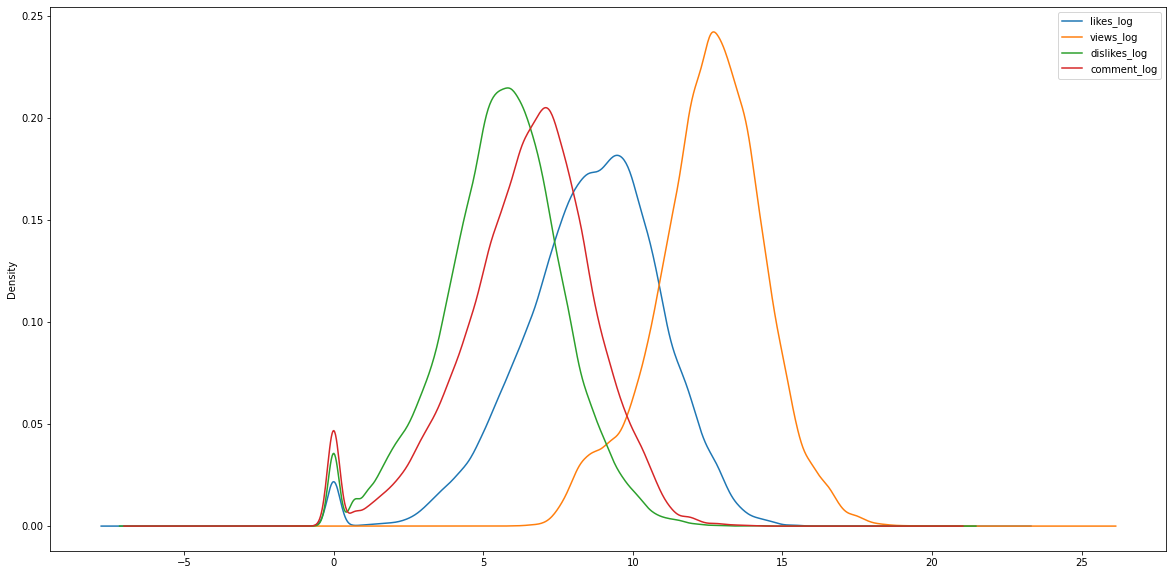

In [20]:
# Add your code here for plotting the distribution
log_df=combined_data[['likes_log','views_log','dislikes_log','comment_log']]
log_df.plot.kde(figsize=(20,10))
# plot data

#### 5.2.4: Comparing views, likes, dislikes against categories (3 pt)

Let us gain isights into data using various catergories, views, likes and dislikes.

Draw three plots for the following:

1.) How many videos are there for each category?

2.) What is the distribution of views against categories? (Use boxplot and views on log scale)

3.) What is the distribution of dislikes against categories? (Use boxplot and dislikes on log scale)

For extra credit:
You can try to gain more insights into the dataset by drawing interesting plots. Some ideas include:

* How long does a video trend in a country? 
* What are some videos which got popular because they were disliked? 

Think of such interesting things and add here. We will award points based on creativity of the insights that you get.

In [21]:
# Your code goes here
# Plots will be manually graded
##1-Total videos for each category:
by_category = combined_data.groupby(["category"]).size().sort_values(ascending = False)
print('Total videos for each category: \n', by_category)

Total videos for each category: 
 category
Entertainment            48964
Music                    17818
Comedy                   14790
News & Politics          14713
People & Blogs           13954
Sports                    9488
Howto & Style             9309
Film & Animation          7874
Science & Technology      4846
Education                 4544
Gaming                    3592
Pets & Animals            1522
Autos & Vehicles          1406
Travel & Events            889
Shows                      485
Nonprofits & Activism      338
Movies                      33
Trailers                     2
dtype: int64


In [19]:
import plotly.express as px
df_cat=pd.DataFrame(by_category)
df_cat['category'] = df_cat.index
df_cat.columns=['a','b']
fig4 = px.bar(df_cat, x="b", y="a",color='a',labels={'b':'Category','a':'Videos/Category'}, height=400)
fig4.update_layout({'plot_bgcolor': 'rgba(0, 0, 0, 0)','paper_bgcolor': 'rgba(0, 0, 0, 0)',})

(Text(0.5, 1.0, 'Distribution of Views against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'View Logs'))

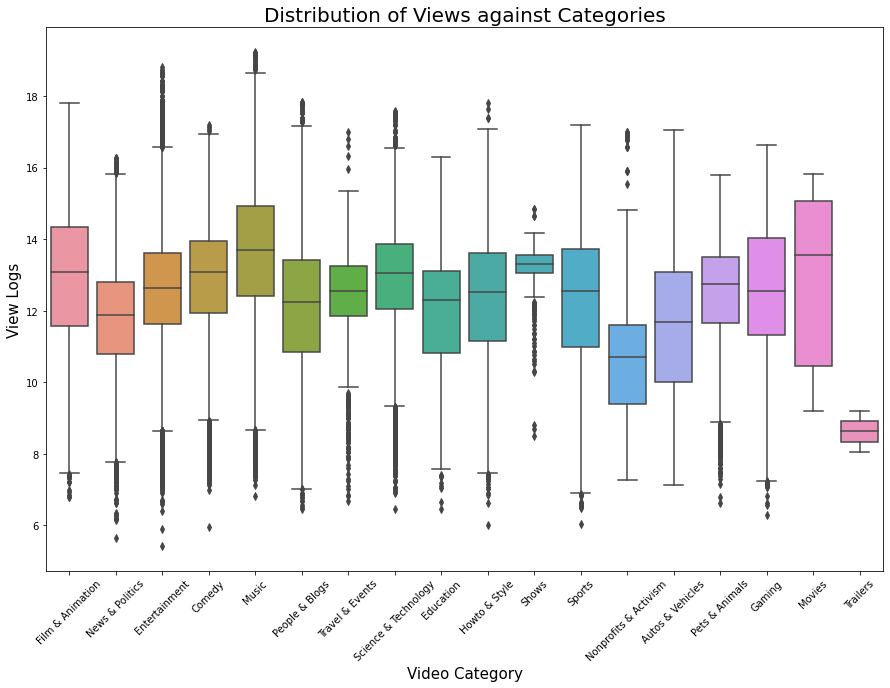

In [22]:
##2-Distribution of views against categories, using boxplot and views on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="views_log", data=combined_data[['category','views_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Views against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='View Logs',fontsize=15)          
# #To close the warning
# fill with colors

(Text(0.5, 1.0, 'Distribution of Dislikes against Categories'),
 Text(0.5, 0, 'Video Category'),
 Text(0, 0.5, 'Dislike Logs'))

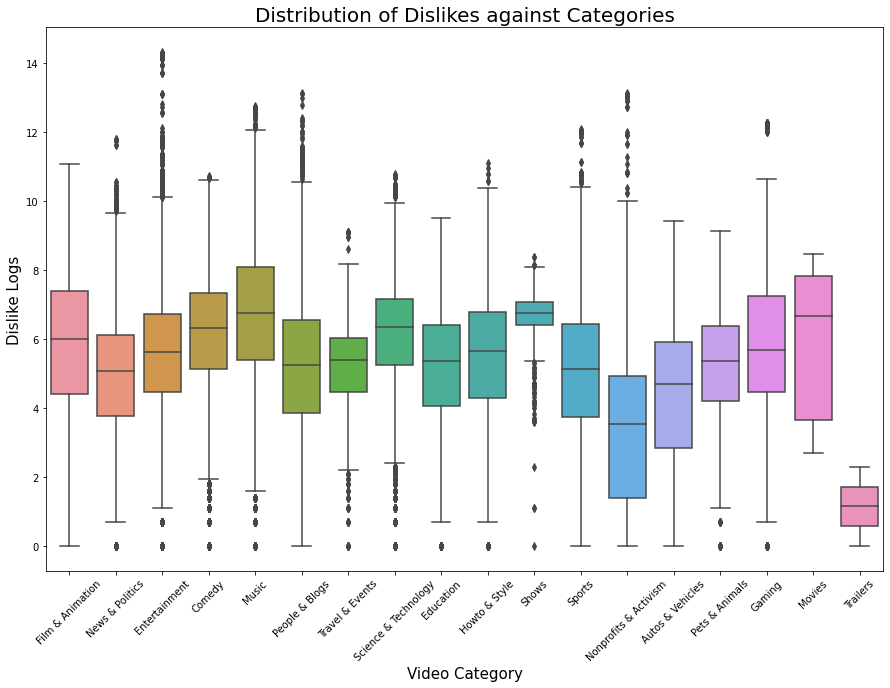

In [21]:
##3-Distribution of dislikes against categories, Using boxplot and dislikes on log scale
fig, ax = pyplot.subplots(figsize=(15,10))
sns.boxplot(x="category", y="dislikes_log", data=combined_data[['category','dislikes_log']]),plt.xticks(rotation = 45)
ax.set_title("Distribution of Dislikes against Categories",fontsize=20),ax.set_xlabel('Video Category',fontsize=15),ax.set_ylabel(ylabel='Dislike Logs',fontsize=15)  


In [ ]:
#How long does a video trend in a country?
#What are some videos which got popular because they were disliked?

**How long does a video trend in a country?**

(<matplotlib.axes._subplots.AxesSubplot at 0x7f098d02d7d0>,
 Text(0.5, 1.0, 'Number of Mean Video Trending in Each Country '))

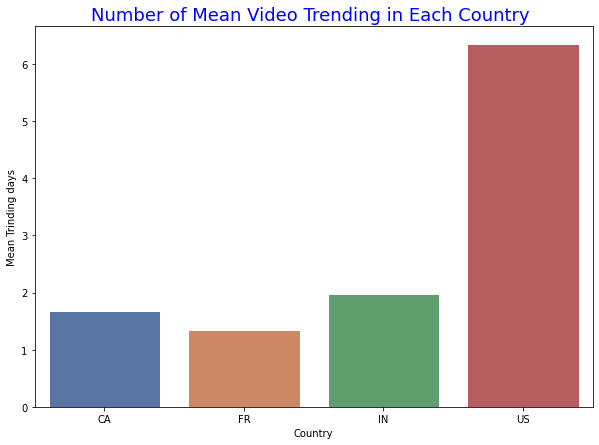

In [22]:
df=combined_data.drop_duplicates()
df1=df.groupby(['title','country']).size().reset_index(name='count')
trending=df1.groupby('country')['count'].mean().to_frame().reset_index().rename(columns={"country": "Country", "count": "Mean Trinding days"})

fig, ax = pyplot.subplots(figsize=(10, 7)),sns.set(font_scale=1.5)
sns.barplot(x="Country", y="Mean Trinding days", data=trending,ax=ax),plt.title('Number of Mean Video Trending in Each Country ',color='Blue')

**What are some videos which got popular because they were disliked?**

In [23]:
df2=df.groupby(['title','dislikes','likes']).size().reset_index(name='Trend_Days')
trending_dislikes=df2.loc[(df2['dislikes'] > df2['likes']) & (df2['Trend_Days'] >= 3)] #Videos which got trends and have dislikes more than likes#
trending_dislikes=trending_dislikes.sort_values(['Trend_Days'],ascending=[ False])
print('Videos which got popular because they were disliked: \n \n',trending_dislikes.title.to_string(index=False))

Videos which got popular because they were disliked: 
 
 Jeffrey Tambor Fired From 'Transparent' Followi...
5 Things You Missed at the 2018 SAG Awards | E!...
Fergie Performs The U.S. National Anthem / 2018...
                        Staudt on Sports I 1-22-18
         WATCH: Sen. Mitch McConnell on tax reform
                               二贵摔跤 - tienghoa.net


#### 5.2.5: Feature Engineering (8 pts)



##### a. Processing tags (1 pt)

The feature tags in the dataset has a delimiter, use that delimiter to count the number of tags, create a feature called num_tags and add that to the dataset.

In [23]:
# Add your code here
num_tags=[]
xdf=combined_data.reset_index(drop=True)
for i in range(len(combined_data)):
  if xdf.at[i,'tags']=='[none]': #some videos has no tags but instead [none], so we are going to consider it as Zero tags.
    count=0
  else:
    count=(xdf.at[i,'tags']).count("|") + 1 
  num_tags.append(count)
combined_data['num_tags']=num_tags
combined_data


,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags
video_id,,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15
zUZ1z7FwLc8,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,2017-11-13 05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19
10L1hZ9qa58,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,2017-11-12 15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14
N1vE8iiEg64,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,2017-11-12 07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg,False,False,False,This video showcases the difference between pe...,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20
kJzGH0PVQHQ,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,2017-11-13 01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mSJ_Qb9-WtA,2018-06-14,Simon Cowell Falls In LOVE With 'Ms. Trysh' Bu...,Talent Recap,24,2018-06-13 01:36:56,"America’s got talent|""Americas got talent""|""ag...",560827,8688,147,696,https://i.ytimg.com/vi/mSJ_Qb9-WtA/default.jpg,False,False,False,#Full Segment | America’s Got Talent Season 13...,FR,Entertainment,9.069813,13.237170,4.997212,6.546785,29
coVXf3Q9xBk,2018-06-14,عاجل و رسمي : الملف الأمريكي يفوز بشرف تنظيم ك...,KORA LOVERS,1,2018-06-13 12:31:04,"تنظيم كأس العالم 2026|""كأس العالم 2026""|""المغر...",58758,307,86,485,https://i.ytimg.com/vi/coVXf3Q9xBk/default.jpg,False,False,False,المغرب تخسر تنظيم مونديال كاس العالم 2026 لصال...,FR,Film & Animation,5.730100,10.981200,4.465908,6.186209,6
_umkjOQJvtw,2018-06-14,شاهد ملخص البرلمان اليوم بحضور اخنوش الدي يعطي...,Jadal جدل,25,2018-06-12 17:51:24,"الباكالوريا في المغرب|""صحاب الباك""|""صحاب الباك...",264639,2011,999,1397,https://i.ytimg.com/vi/_umkjOQJvtw/default.jpg,False,False,False,ملخص ابرز ما حصل في جلسة البرلمان يوم 12/06/20...,FR,News & Politics,7.606885,12.486126,6.907755,7.242798,34


##### b. Processing description and title (2 pts.)

Calculate the length of description and title and add them as features to the dataset

In [24]:
# Add your code here
combined_data["desc_len"]=combined_data["description"].apply(lambda x: len(x))

In [25]:
# Add your code here

combined_data["len_title"]=combined_data["title"].apply(lambda x: len(x))

In [26]:
# Print cell
print('check_tags_title_description \n',([combined_data['num_tags'].describe(),combined_data['desc_len'].describe(),combined_data['len_title'].describe()]))

check_tags_title_description 
 [count    154567.000000
mean         18.580551
std          11.929906
min           0.000000
25%           9.000000
50%          17.000000
75%          26.000000
max         124.000000
Name: num_tags, dtype: float64, count    154567.000000
mean        959.949426
std         857.504028
min           1.000000
25%         363.000000
50%         717.000000
75%        1288.000000
max        5260.000000
Name: desc_len, dtype: float64, count    154567.000000
mean         56.408541
std          22.976198
min           2.000000
25%          38.000000
50%          54.000000
75%          74.000000
max         100.000000
Name: len_title, dtype: float64]


##### c. Processing publish_time. (4 pts.)


Split 'publish_time' feature into three parts time, date, and weekday, where time will contain the time component of the original feature and date and weekday will store the corresponding date and weekday number respectively. Start with 1 for Monday and end with 7 for Sunday.

In [27]:
date_data=combined_data['publish_time']

In [28]:
# Add your code here
combined_data['publish_time'] =date_data.apply(lambda x: pd.to_datetime(x).time())
combined_data['publish_date'] =date_data.apply(lambda x: pd.to_datetime(x).date())

#day on which video was published
combined_data['publish_weekday']=date_data.apply(lambda x: x.dayofweek)+1

import random
random_index = random.randint(0,combined_data.shape[0]-1)


In [29]:
# Print cell
print('check_date_time_processing',([combined_data['publish_time'].iloc[random_index],combined_data['publish_date'].iloc[random_index],sorted(list(combined_data["publish_weekday"].value_counts()))]))

check_date_time_processing [datetime.time(17, 0, 6), datetime.date(2018, 1, 2), [18641, 18931, 22146, 22501, 22523, 23573, 26252]]


##### d. Number of videos per weekday (1 pt)

Calculate the number of videos published per day of the week. Which day of the week do people publish most videos? Make a visualization demonstrating the result.

(<matplotlib.axes._subplots.AxesSubplot at 0x7fc9eed1a550>,
 Text(0.5, 1.0, 'Number of puplished videos per week days '))

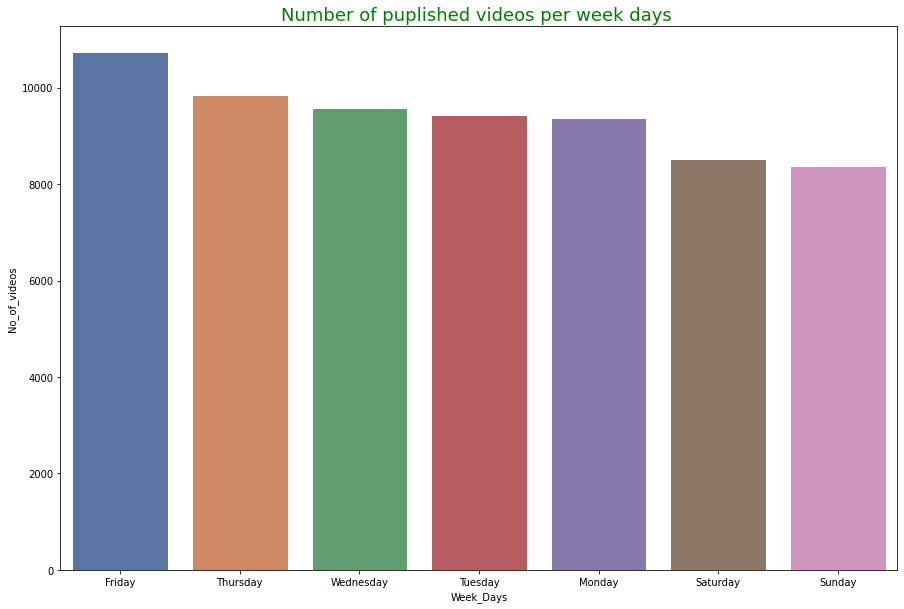

In [30]:
# Add your code for plot here

##Creating dataframe after deleting videos which stay trending for more than one day according to the Video ID
dfx=combined_data.reset_index(level=0)[['video_id','publish_weekday']].drop_duplicates(subset = ['video_id'], keep = 'last')

##Mapping the day number : day name
dayOfWeek={1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday', 5:'Friday', 6:'Saturday', 7:'Sunday'}
dfx['publish_weekday'] = dfx['publish_weekday'].map(dayOfWeek)

##Calculating and plotting
videos_weekday = dfx['publish_weekday'].value_counts().to_frame().reset_index().rename(columns={"index": "Week_Days", "publish_weekday": "No_of_videos"})
fig, ax = pyplot.subplots(figsize=(15, 10)),sns.set(font_scale=1.5)
sns.barplot(x="Week_Days", y="No_of_videos", data=videos_weekday,ax=ax),plt.title('Number of puplished videos per week days ',color='Green')
# Plots will be manually graded

#### 5.2.6: Dropping irrelevant non numeric columns (1 pt.)

Drop all the columns that are non-numeric as we have processed them and stored the information captured in them in the dataset as numbers. 

Note that a few key columns are non-numeric but should be kept in the dataframe:

comments_disabled, ratings_disabled, video_error_or_removed, country

Also drop original views, like, comments and dislikes as you have processed them as logs and stored them as separate feature. 

In [31]:
combined_data.columns

Index(['trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'country', 'category',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'publish_date', 'publish_weekday'],
      dtype='object')

In [32]:
# Add your code here
combined_data.drop(['trending_date', 'title', 'channel_title', 'category_id',
                    'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
                    'thumbnail_link', 'description', 'publish_date'], axis = 1,inplace = True)

In [33]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,country,category,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,publish_weekday
video_id,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,IN,Film & Animation,10.433145,13.907477,6.683361,6.783325,15,920,81,7
zUZ1z7FwLc8,True,False,False,IN,News & Politics,6.601230,13.288051,6.807935,0.000000,19,2232,58,1
10L1hZ9qa58,False,False,False,IN,Entertainment,7.606885,13.068939,5.497168,5.010635,14,482,58,7
N1vE8iiEg64,False,False,False,IN,Comedy,11.161295,14.032782,7.393263,7.895436,20,263,30,7
kJzGH0PVQHQ,False,False,False,IN,Entertainment,6.200509,13.047674,5.683580,4.204693,11,753,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
mSJ_Qb9-WtA,False,False,False,FR,Entertainment,9.069813,13.237170,4.997212,6.546785,29,1883,83,3
coVXf3Q9xBk,False,False,False,FR,Film & Animation,5.730100,10.981200,4.465908,6.186209,6,69,76,3
_umkjOQJvtw,False,False,False,FR,News & Politics,7.606885,12.486126,6.907755,7.242798,34,751,94,2


#### 5.2.7: Convert categorical features in the dataset into one hot vectors. (3 pts)

There are three categorical features remaining in the dataset, identify them and convert them into one hot vectors. Be sure that when you one hot encode, the original column is replaced.

In [34]:
combined_data.publish_weekday = combined_data.publish_weekday.astype('category')
combined_data.country = combined_data.country.astype('category')
combined_data.category = combined_data.category.astype('category')
combined_data= pd.get_dummies(combined_data)
# Hint: Use pd.get_dummies()range. 

In [35]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,views_log,dislikes_log,comment_log,num_tags,desc_len,len_title,country_CA,country_FR,country_IN,country_US,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mSJ_Qb9-WtA,False,False,False,9.069813,13.237170,4.997212,6.546785,29,1883,83,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
coVXf3Q9xBk,False,False,False,5.730100,10.981200,4.465908,6.186209,6,69,76,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
_umkjOQJvtw,False,False,False,7.606885,12.486126,6.907755,7.242798,34,751,94,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [36]:
# Print cell.
print('check_final_df',(combined_data.shape))

check_final_df (154567, 39)


Let's write out the modified data we created to a file so that we can reuse it in Section 2.

In [37]:
combined_data_sec_2 = combined_data.copy()
combined_data_sec_2.rename(columns = {'views_log':'label'}, inplace = True) 
combined_data_sec_2.to_csv('combined_data.csv')

#### 5.2.8: Split into x and y (1 pt)

Split the data into features and label, in this case the features are anything but views_log and the label is views_log.

In [38]:
combined_data.columns

Index(['comments_disabled', 'ratings_disabled', 'video_error_or_removed',
       'likes_log', 'views_log', 'dislikes_log', 'comment_log', 'num_tags',
       'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN',
       'country_US', 'category_Autos & Vehicles', 'category_Comedy',
       'category_Education', 'category_Entertainment',
       'category_Film & Animation', 'category_Gaming',
       'category_Howto & Style', 'category_Movies', 'category_Music',
       'category_News & Politics', 'category_Nonprofits & Activism',
       'category_People & Blogs', 'category_Pets & Animals',
       'category_Science & Technology', 'category_Shows', 'category_Sports',
       'category_Trailers', 'category_Travel & Events', 'publish_weekday_1',
       'publish_weekday_2', 'publish_weekday_3', 'publish_weekday_4',
       'publish_weekday_5', 'publish_weekday_6', 'publish_weekday_7'],
      dtype='object')

In [39]:
# Add your code here
combined_data=pd.read_csv('combined_data.csv').set_index('video_id')
label = combined_data['label']
features = combined_data.drop(['label'],axis=1)


In [40]:
label.head()

video_id
kzwfHumJyYc    13.907477
zUZ1z7FwLc8    13.288051
10L1hZ9qa58    13.068939
N1vE8iiEg64    14.032782
kJzGH0PVQHQ    13.047674
Name: label, dtype: float64

In [41]:
combined_data

,comments_disabled,ratings_disabled,video_error_or_removed,likes_log,label,dislikes_log,comment_log,num_tags,desc_len,len_title,country_CA,country_FR,country_IN,country_US,category_Autos & Vehicles,category_Comedy,category_Education,category_Entertainment,category_Film & Animation,category_Gaming,category_Howto & Style,category_Movies,category_Music,category_News & Politics,category_Nonprofits & Activism,category_People & Blogs,category_Pets & Animals,category_Science & Technology,category_Shows,category_Sports,category_Trailers,category_Travel & Events,publish_weekday_1,publish_weekday_2,publish_weekday_3,publish_weekday_4,publish_weekday_5,publish_weekday_6,publish_weekday_7
video_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
kzwfHumJyYc,False,False,False,10.433145,13.907477,6.683361,6.783325,15,920,81,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
zUZ1z7FwLc8,True,False,False,6.601230,13.288051,6.807935,0.000000,19,2232,58,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
10L1hZ9qa58,False,False,False,7.606885,13.068939,5.497168,5.010635,14,482,58,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
N1vE8iiEg64,False,False,False,11.161295,14.032782,7.393263,7.895436,20,263,30,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
kJzGH0PVQHQ,False,False,False,6.200509,13.047674,5.683580,4.204693,11,753,88,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mSJ_Qb9-WtA,False,False,False,9.069813,13.237170,4.997212,6.546785,29,1883,83,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
coVXf3Q9xBk,False,False,False,5.730100,10.981200,4.465908,6.186209,6,69,76,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
_umkjOQJvtw,False,False,False,7.606885,12.486126,6.907755,7.242798,34,751,94,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [42]:
# print cell
print('check_x_y_split',([features.shape, label.describe()]))

check_x_y_split [(154567, 38), count    154567.000000
mean         12.552680
std           1.816821
min           5.411646
25%          11.469496
50%          12.655328
75%          13.761413
max          19.232552
Name: label, dtype: float64]


## 5.3 : Machine Learning using sklearn (15 pts)

Scikit-learn (formerly scikits.learn and also known as sklearn) is a free software machine learning library for the Python programming language. It features various classification, regression and clustering algorithms including support vector machines, random forests, gradient boosting, k-means and DBSCAN, and is designed to interoperate with the Python numerical and scientific libraries NumPy and SciPy.

You can find the documentation [here](https://scikit-learn.org/stable/modules/classes.html)

Now we will train some machine learning models using sklearn to predict views, rather than predicting views directly we will predict views_log to avoid numerical instability issues

### 5.3.1 : Split data into train and test (1 pt)

Use sklearn's train_test_split library and split data into train and test sets, the split should be 80-20 meaning 80% for training and rest for testing.


In [43]:
from sklearn.model_selection import train_test_split
# Add your code here
x_train, x_test, y_train, y_test = train_test_split(features.values, label.values, test_size=0.2, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [44]:
# print cell.
print('check_data_split',[x_train.shape,x_test.shape,y_train.shape,y_test.shape])

check_data_split [(123653, 38), (30914, 38), (123653,), (30914,)]


### 5.3.2: Train Machine Learning Models.

#### 5.3.2.1 Linear Regression (3 pts)

In this step we will train a linear regression model using sklearn. Train using the training data and then make predictions of test, report the mean squared error obtained on both train and test sets.

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Add your code here
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error

# Create linear regression object
lin_R = LinearRegression()

# Train the model using the training sets
lin_R.fit(x_train, y_train)

# Make predictions

y_predict_test = lin_R.predict(x_test)
y_predict_train= lin_R.predict(x_train)

# The coefficients
#print('Coefficients: \n', lin_R.coef_)

print('r Squared: %.2f'
      % lin_R.score(x_test, y_test))

print('mse_value of Test=',mean_squared_error(y_test, y_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_predict_train))
mse_test= mean_squared_error(y_test, y_predict_test)

r Squared: 0.86
mse_value of Test= 0.4501796950831465
mse_value of Train= 0.44447655160156535


In [46]:
print('check_lr', (np.sqrt(mean_squared_error(y_test, y_predict_test))))

check_lr 0.6709543166886599


#### 5.3.2.2  Dimensionality reduction with PCA (6 pts)



##### Step 1: Fitting PCA and explained_variance_ratiio
Use Principal component analysis to reduce number of dimensions of the dataset, as a first step fit a pca model on your train set and then plot the explained_variance_ratio against the number of components to decide the number of components you should keep. (3 pts)

[(0, 0.09114437064542778), (1, 0.13964535441590084), (2, 0.17826250312827094), (3, 0.2166464981401218), (4, 0.2507656035601217), (5, 0.2841670696588904), (6, 0.31696252506305417), (7, 0.3484300996969708), (8, 0.3795857235404512), (9, 0.41056507315073776), (10, 0.4411157760986382), (11, 0.47090310316987216), (12, 0.5005103909189328), (13, 0.5293190935711924), (14, 0.5577160620626272), (15, 0.5858461034376294), (16, 0.6133433538548405), (17, 0.6403387909621302), (18, 0.6671331280114056), (19, 0.6937889668477255), (20, 0.7202712860718251), (21, 0.7465993596275723), (22, 0.7728971509229412), (23, 0.7990624359041844), (24, 0.8247984126544388), (25, 0.8503078483042205), (26, 0.8752999037658546), (27, 0.8999221450768852), (28, 0.922478403588195), (29, 0.9430658100164777), (30, 0.9622081843818363), (31, 0.9794288638141729), (32, 0.9948961438974186), (33, 0.9982943541270501), (34, 0.9999999999999999), (35, 0.9999999999999999), (36, 0.9999999999999999), (37, 0.9999999999999999)]


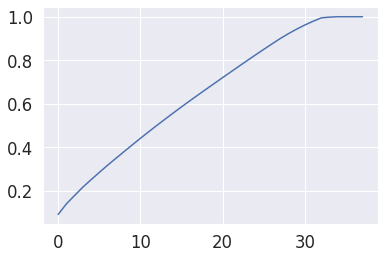

In [47]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Add your code here

pca = PCA()
sc = StandardScaler()
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)

[(0, 0.09114437064542778), (1, 0.13964535441590084), (2, 0.17826250312827094), (3, 0.2166464981401218), (4, 0.2507656035601217), (5, 0.2841670696588904), (6, 0.31696252506305417), (7, 0.3484300996969708), (8, 0.3795857235404512), (9, 0.41056507315073776), (10, 0.4411157760986382), (11, 0.47090310316987216), (12, 0.5005103909189328), (13, 0.5293190935711924), (14, 0.5577160620626272), (15, 0.5858461034376294), (16, 0.6133433538548405), (17, 0.6403387909621302), (18, 0.6671331280114056), (19, 0.6937889668477255), (20, 0.7202712860718251), (21, 0.7465993596275723), (22, 0.7728971509229412), (23, 0.7990624359041844), (24, 0.8247984126544388), (25, 0.8503078483042205), (26, 0.8752999037658546), (27, 0.8999221450768852), (28, 0.922478403588195), (29, 0.9430658100164777), (30, 0.9622081843818363), (31, 0.9794288638141729), (32, 0.9948961438974186), (33, 0.9982943541270501)]


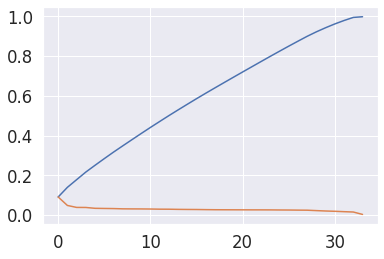

In [48]:
#It is strating faltten with number of component = 34 (99% of variance)
pca = PCA(34)
x_train_std=pca.fit_transform(x_train)
np.set_printoptions(suppress=True)
var_vs_pca = np.cumsum(pca.explained_variance_ratio_)
print([(i,x) for i, x in enumerate(var_vs_pca)])
# plotting the explained_variance_ratio against the number of components
plt.plot(var_vs_pca)
plt.plot(pd.Series(pca.explained_variance_ratio_))

##### Step 2: Deciding number of components to keep
Use the plot to decide the number of components to keep, choose a number that explains atleast 95% of variance in the dataset. Then fit and transform your pca on training set using the number of components you decided. (1 pts)

**Remember that your pca should be trained on the training set (and transformed here) but only transformed on the test set.**

In [49]:
# Add your code here
pca = PCA(n_components=34)
x_train_Trans=pca.fit_transform(x_train)
x_test_Trans=pca.transform(x_test)

In [50]:
# Print cell.
print('check_pca', (x_train_Trans[:50,:]))

check_pca [[ 1.31305907 -1.48578289  1.24574063 ...  0.88801205 -0.52445947
   0.35629781]
 [ 1.57628392 -1.3293555  -0.59717231 ... -0.25040698  0.73123884
  -0.77383625]
 [ 1.48606608 -2.07699671  0.61109962 ...  0.19852404  0.17028792
  -0.25180728]
 ...
 [-0.47991198  1.04617749 -1.26238084 ...  1.63427858  1.12314663
  -0.18538237]
 [ 1.34358739 -0.57298647 -0.69921481 ... -0.02796011 -0.89975098
   0.6743474 ]
 [-1.92939034 -0.617451    0.80057069 ... -1.955244    0.36451679
  -0.55016875]]


### 5.3.2.3 Random Forest. (10 pts)



##### Step 1: Hyperparameter tuning. 
Use grid search and train a random forest model on the transformed train dataset. Take a look at the sklearn `RandomForestRegressor` documentation and tune the max_depth hyperparameter using grid search. We have already tested the number of estimators hyperparameter for you. Note this section may take a while to run depending on how large your grid is. 

(Hint: refer to the GridSearchCV documentation and do some reading on how the max_depth in a RF model affects the result - while theory may help guide a rough estimate of possible hyperparameters, we can cross validate values using tools like GridSearch.

Our autograder has tiered points for this question depending on your final MSE value but is fairly generous; we are not requiring that you find the **most** optimal value for this hyperparameter but rather demonstrate understanding of grid search optimization. (4 pts)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Add your code here
# Only tune the max depth of the trees in the RF hyperparameter.
grid = GridSearchCV(estimator=RandomForestRegressor(), param_grid={'n_estimators':[140],'max_depth':[25,30,35,40,45]},cv=5)
grid.fit(x_train_Trans, y_train)
grid.best_params_
# depth = [40]
# nEstimator = [140]

##### Step 2: Fitting RF
Fit the random forest on the training data using the parameters you computed above. Then make predictions on the test set, report the root mean squared error for the test set. (3 pts)

In [ ]:
# Add your code here
# Set n_estimators = 140
reg_RF = RandomForestRegressor(n_estimators=140, max_depth=40)
reg_RF.fit(x_train_Trans, y_train)
y_pred_RF = reg_RF.predict(x_test_Trans)

In [ ]:
# Print cell
print('check_rf', (np.sqrt(mean_squared_error(y_test, y_pred_RF))))

check_rf 0.469687142584046


## Almost halfway there :)

Well done! Almost halfway there :)



# Section 2 : Distributed Machine Learning with Spark (55 Points)

Apache Spark ML is the machine learning library consisting of common learning algorithms and utilities, including classification, regression, clustering, collaborative filtering, dimensionality reduction, and underlying optimization primitives.

Why Spark ML?

Moving to the Big Data Era requires heavy iterative computations on very big datasets. Standard implementations of machine learning algorithms require very powerful machines to be able to run. Depending on high-end machines is not advantageous due to their high price and improper costs of scaling up. The idea of using distributed computing engines is to distribute the calculations to multiple low-end machines (commodity hardware) instead of a single high-end one. This definitely speeds up the learning phase and allows us to create better models.

Read more about it with the python documentation [here](https://spark.apache.org/docs/latest/ml-guide.html)

### Initializing Spark Connection - Boring setup stuff again


In [21]:
!apt install libkrb5-dev
!wget https://www-us.apache.org/dist/spark/spark-2.4.5/spark-2.4.5-bin-hadoop2.7.tgz
!tar xf spark-2.4.5-bin-hadoop2.7.tgz
!pip install findspark
!pip install sparkmagic
!pip install pyspark
!pip install pyspark --user
!pip install seaborn --user
!pip install plotly --user
!pip install imageio --user
!pip install folium --user

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-470
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9
Suggested packages:
  doc-base krb5-doc krb5-user
The following NEW packages will be installed:
  comerr-dev krb5-multidev libgssrpc4 libkadm5clnt-mit11 libkadm5srv-mit11
  libkdb5-9 libkrb5-dev
0 upgraded, 7 newly installed, 0 to remove and 39 not upgraded.
Need to get 349 kB of archives.
After this operation, 1,992 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libgssrpc4 amd64 1.16-2ubuntu0.2 [54.4 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libkdb5-9 amd64 1.16-2ubuntu0.2 [37.3 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates

In [22]:
!apt update
!apt install gcc python-dev libkrb5-dev

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Hit:5 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [696 B]
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu 

In [23]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pyspark.sql.functions as F

import os

spark = SparkSession.builder.appName('CA-5').getOrCreate()


In [24]:
%load_ext sparkmagic.magics

In [25]:
#graph section
import networkx as nx
# SQLite RDBMS
import sqlite3
# Parallel processing
# import swifter
import pandas as pd
# NoSQL DB
from pymongo import MongoClient
from pymongo.errors import DuplicateKeyError, OperationFailure

import os
os.environ['SPARK_HOME'] = '/content/spark-2.4.5-bin-hadoop2.7'
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
import pyspark
from pyspark.sql import SQLContext

In [26]:
try:
    if(spark == None):
        spark = SparkSession.builder.appName('Initial').getOrCreate()
        sqlContext=SQLContext(spark)
except NameError:
    spark = SparkSession.builder.appName('Initial').getOrCreate()
    sqlContext=SQLContext(spark)


### 5.1 Data Preparation for Spark ML (20 points)

Once the spark setup ready. Next, we need the prepared data for our ML algorithms. We will use the same data you processed in Section 1 but now in spark. 

Read in the csv  into a spark dataframe. Set the "inferSchema" flag to True so that the columns are the correct datatypes and not all strings. Further, set the parameter to the first row as column headers.

In [57]:
# Add your code here

train_sdf = spark.read.format('csv').options(header='true', inferSchema='true').load('combined_data.csv')
#copy the new data. this will be useful for out classification method in task 2
train_sdf_copy = train_sdf

Let us make sure everything is smooth to proceed

In [58]:
display(train_sdf.show())

+-----------+-----------------+----------------+----------------------+------------------+------------------+------------------+------------------+--------+--------+---------+----------+----------+----------+----------+-------------------------+---------------+------------------+----------------------+-------------------------+---------------+----------------------+---------------+--------------+------------------------+------------------------------+-----------------------+-----------------------+-----------------------------+--------------+---------------+-----------------+------------------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+-----------------+
|   video_id|comments_disabled|ratings_disabled|video_error_or_removed|         likes_log|             label|      dislikes_log|       comment_log|num_tags|desc_len|len_title|country_CA|country_FR|country_IN|country_US|category_Autos & Vehicles|category_Comedy|categ

None

Print out the dataframe schema and verify the datatypes

In [59]:
#Task: Print the dataframe schema and verify
# Add your code here
display(train_sdf.printSchema())

root
 |-- video_id: string (nullable = true)
 |-- comments_disabled: boolean (nullable = true)
 |-- ratings_disabled: boolean (nullable = true)
 |-- video_error_or_removed: boolean (nullable = true)
 |-- likes_log: double (nullable = true)
 |-- label: double (nullable = true)
 |-- dislikes_log: double (nullable = true)
 |-- comment_log: double (nullable = true)
 |-- num_tags: integer (nullable = true)
 |-- desc_len: integer (nullable = true)
 |-- len_title: integer (nullable = true)
 |-- country_CA: integer (nullable = true)
 |-- country_FR: integer (nullable = true)
 |-- country_IN: integer (nullable = true)
 |-- country_US: integer (nullable = true)
 |-- category_Autos & Vehicles: integer (nullable = true)
 |-- category_Comedy: integer (nullable = true)
 |-- category_Education: integer (nullable = true)
 |-- category_Entertainment: integer (nullable = true)
 |-- category_Film & Animation: integer (nullable = true)
 |-- category_Gaming: integer (nullable = true)
 |-- category_Howto & 

None

Now, we have the processed data in hand. Next for the Spark ML, we need to create a feature column that has all features concatenated and a single column for labels.

You can use VectorAssembler() to create a feature vector from all categorical and numerical features. Let us call the call the final vector as “features”.

Now, list all columns in the data and store it in a list named 'all_columns'


In [60]:
from pyspark.ml.feature import StringIndexer, VectorAssembler

In [61]:
# Add your code here
all_columns =train_sdf.columns

Now create a list of columns which you don't wan't to include in your features, i.e., the labels and probably other columns which are not useful for the machine learning model. Let us call this list drop_columns.

In [62]:
# Add your code here
drop_columns = drop_columns = ['video_id','label']

In [63]:
columns_to_use = [i for i in all_columns if i not in drop_columns]

Now create a VectorAssembler object with columns you want to use for the ML models. Let us Name the output column as 'features'. These are the features that you will use later.  Let us name the vector assembler object 'assembler'

In [64]:
# Add your code
assembler = VectorAssembler(inputCols=columns_to_use, outputCol='features')

In [65]:
# Print assember stats
print('stat_assembler', (str(assembler.params), columns_to_use))

stat_assembler ('[Param(parent=\'VectorAssembler_3d56513be088\', name=\'handleInvalid\', doc="How to handle invalid data (NULL and NaN values). Options are \'skip\' (filter out rows with invalid data), \'error\' (throw an error), or \'keep\' (return relevant number of NaN in the output). Column lengths are taken from the size of ML Attribute Group, which can be set using `VectorSizeHint` in a pipeline before `VectorAssembler`. Column lengths can also be inferred from first rows of the data since it is safe to do so but only in case of \'error\' or \'skip\')."), Param(parent=\'VectorAssembler_3d56513be088\', name=\'inputCols\', doc=\'input column names.\'), Param(parent=\'VectorAssembler_3d56513be088\', name=\'outputCol\', doc=\'output column name.\')]', ['comments_disabled', 'ratings_disabled', 'video_error_or_removed', 'likes_log', 'dislikes_log', 'comment_log', 'num_tags', 'desc_len', 'len_title', 'country_CA', 'country_FR', 'country_IN', 'country_US', 'category_Autos & Vehicles', 'c

Now, we are ready to create a pipeline with different stages.  For out data so far, we just a single stage with the assember, however, you could have other stages  before that where you perform operations on the data, e.g, transforming categorical strings to numeric values or feature scaling operations.

In this step, we will create a pipeline with a single stage - the assembler. Fit the pipeline to your data and create the transformed dataframe and name it 'modified_data_sdf'.

In [66]:
from pyspark.ml import Pipeline
# Add your code here
pipeline = Pipeline(stages=[assembler])
modified_data_sdf = pipeline.fit(train_sdf).transform(train_sdf).drop(*columns_to_use)
display(modified_data_sdf.show())

+-----------+------------------+--------------------+
|   video_id|             label|            features|
+-----------+------------------+--------------------+
|kzwfHumJyYc|13.907476971790734|(38,[3,4,5,6,7,8,...|
|zUZ1z7FwLc8|13.288050682295575|(38,[0,3,4,6,7,8,...|
|10L1hZ9qa58|13.068939393656878|(38,[3,4,5,6,7,8,...|
|N1vE8iiEg64|14.032781700387753|(38,[3,4,5,6,7,8,...|
|kJzGH0PVQHQ|13.047674313372497|(38,[3,4,5,6,7,8,...|
|il_pSa5l98w|15.624892174393528|(38,[3,4,5,6,7,8,...|
|7MxiQ4v0EnE|15.559263780679146|(38,[3,4,5,6,7,8,...|
|c64I9HNpiOY| 16.17526697582603|(38,[3,4,5,6,7,8,...|
|KObFEYCaRx8| 11.68033640902843|(38,[3,4,5,6,7,8,...|
|g8QsfJhFpjY|13.784051882105244|(38,[3,4,5,6,7,8,...|
|4du1KXBl4YU| 13.35782751759637|(38,[3,4,5,6,7,8,...|
|zOOmEDwPJX0|14.669120455465158|(38,[3,4,5,6,7,8,...|
|Prb_osSVE0M| 11.95816241638283|(38,[0,3,4,6,7,8,...|
|KHxdrECEsD0|13.065610998767987|(38,[3,4,5,6,7,8,...|
|so0ccfs-psI|13.636392265237525|(38,[3,4,5,6,7,8,...|
|7gShaSuK_PY|11.402351382259

None

In [67]:
#Print results
pipeline_stat = pd.DataFrame(modified_data_sdf.take(5), columns=modified_data_sdf.columns)
print('check_pipeline', (pipeline_stat.columns.values, pipeline_stat['features'][0].size))

check_pipeline (array(['video_id', 'label', 'features'], dtype=object), 38)


Now that we have the required data in the right format, Let us create our train and test sets. Let us, split into an 80-20 ratio between the train and test sets. Name these 'train_sdf' and 'test_sdf'

In [68]:
# Add your code here
train_sdf, test_sdf = modified_data_sdf.randomSplit([0.8, 0.2], seed = 2021)

In [69]:
#Print results here
print('check_split', (train_sdf.count(), test_sdf.count()))

check_split (123515, 31052)


### 5.2 Linear regression using Spark ML (15 points)

In this section, train s linear regression model to our data and predict the views. This prediction should be based on "Big" data tools, i.e., Spark ML's linear regression. Create a model using this library, fit the training data. 
Afterwards, print the summary stats of the model, i.e, 
- the RMSE error, R2 score and any other information you find useful. Refere the Spark ML documentation online for the implementation.

In this section, we will train the model without any regularization!

In [70]:
from pyspark.ml.regression import LinearRegression

# Add your code here

lr_model = LinearRegression(featuresCol='features', labelCol='label').fit(train_sdf)

In [71]:
trainingSum = lr_model.summary

print("RMSE: %f" % trainingSum.rootMeanSquaredError)
print("r2: %f" % trainingSum.r2)



RMSE: 0.666270
r2: 0.865602


Let us investigate that if the model actually overfits the training data. 

Predict the views for your test data (Note: it is called 'transform' in spark ml). Evaluate the performance using 'RegressionEvaluator' in the Spark ML Regression library. Name prediction column as 'prediction'.

In [72]:
# Add your code here
predictions = lr_model.transform(test_sdf)

In [73]:
from pyspark.ml.evaluation import RegressionEvaluator

# Task: Compute RMSr on the test set

test_rmse_orig = lr_model.evaluate(test_sdf).rootMeanSquaredError

In [74]:
#Print results here
predictions_to_print = predictions.toPandas()
lranswer = [test_rmse_orig, predictions_to_print['prediction'][0:50], predictions_to_print['label'][0:50]]
print('result_lr_test', lranswer)

x=predictions_to_print['prediction'][0:50]
y=predictions_to_print['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

result_lr_test [0.6724315173281634, 0     10.681967
1     10.574513
2     11.067026
3     10.695584
4     10.288274
5     11.587246
6     13.263191
7     11.039429
8     11.543624
9     12.447800
10    12.048265
11    11.262332
12    11.979093
13    11.017248
14    11.525904
15    13.143337
16    13.143337
17    11.067902
18    11.509219
19    11.605152
20    11.864483
21    11.230252
22    13.203988
23    13.530213
24    11.955720
25    12.220296
26    11.874724
27    11.874724
28    13.475613
29    11.812001
30    12.003305
31    11.842119
32    12.897770
33    12.798664
34    11.844243
35    13.568327
36    12.256398
37    12.256398
38    12.638311
39    11.649222
40    12.399532
41    11.647169
42    12.778314
43    11.490042
44    12.721047
45    12.009720
46    12.622373
47    12.622373
48    12.585280
49    13.762015
Name: prediction, dtype: float64, 0      9.668651
1      9.829895
2      9.930129
3     10.712126
4     11.018006
5     11.054835
6     11.153762
7     11.175899
8 

Next, we will implement regularization to avoid overfitting. you can try different  regularization parameters, e.g., try LASSO (L1), Ridge (L2) and elastic net (combination of L1 and L2).

You can try different regularization hyperparameters to initialize three different regularized linear regression models. Compare these regularization methods with each other and the non-regularized method above.


In [75]:
# Add your code here
LR=LinearRegression
model1= LR(featuresCol='features', labelCol='label', elasticNetParam=1, regParam=0.1)
model1_fit=model1.fit(train_sdf)
model2 = LR(featuresCol='features', labelCol='label', elasticNetParam=0, regParam=0.1)
model2_fit=model2.fit(train_sdf)
elastic_net_model =LR(featuresCol='features', labelCol='label', elasticNetParam=0.5, regParam=0.1).fit(train_sdf)

# Compute predictions using each of the models
l1_predictions = model1_fit.transform(test_sdf)
l2_predictions = model2_fit.transform(test_sdf)
elastic_net_predictions = elastic_net_model.transform(test_sdf)

# Task: Calculate the root mean squared error (RMSE) on test set for each of your models
test_rmse_l1 = model1_fit.evaluate(test_sdf).rootMeanSquaredError
test_rmse_l2 = model2_fit.evaluate(test_sdf).rootMeanSquaredError
test_rmse_elastic = elastic_net_model.evaluate(test_sdf).rootMeanSquaredError

In [76]:
# Print your results here
result = [test_rmse_l1, test_rmse_l2, test_rmse_elastic]
print('result_lr_all', result)

result_lr_all [0.7332852444560328, 0.6859293269599341, 0.7050198855105146]


### 5.3 Random Forest Regression 10 pts)

You need an understanding of random forest and its variations,i.e., boosted trees to succeed as a data scientist. These are ensemble methods that are know for generalization and are considered popular for classification and regression problems. Similar to linear regresssion, create a random forest regressor model. After it, train the model using the data and then evaluate its performance using the test data. Finally, compare performance of random forest model with the linear regression model.



In [86]:
from pyspark.ml.regression import RandomForestRegressor
# Add your code here
rf_model = rf_model = RandomForestRegressor(labelCol="label", featuresCol="features").fit(train_sdf) #Task


In [87]:
# Add code here to calculate predictions
predictions = predictions = rf_model.transform(test_sdf) #Task : Calculate predictions on the test set

In [88]:
from pyspark.ml.evaluation import RegressionEvaluator

# Add your code here to instatiate a regressionevaluator 
reg_evaluator = RegressionEvaluator(labelCol="label", predictionCol="prediction", metricName="rmse")
train_rmse_rf = reg_evaluator.evaluate(rf_model.transform(train_sdf)) #Task: Compute the training RMSE
rmse_rf = reg_evaluator.evaluate(predictions) #Task: Compute RMSE using the test set

In [89]:
#Print results of predictions here
predictions_to_reveal = predictions.toPandas()
answer = [train_rmse_rf, predictions_to_reveal['prediction'][0:50], predictions_to_reveal['label'][0:50], rmse_rf]
print('check_rf_spark \n', answer)

x=predictions_to_reveal['prediction'][0:50]
y=predictions_to_reveal['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

check_rf_spark 
 [0.7193255094857036, 0     11.192922
1     10.779136
2     11.000001
3     11.310981
4     10.724894
5     11.785922
6     12.901401
7     11.084243
8     11.671505
9     12.709557
10    11.847332
11    11.461728
12    11.755669
13    11.326059
14    11.507255
15    12.859712
16    12.859712
17    11.151409
18    11.897106
19    11.952154
20    11.866926
21    11.190096
22    12.899405
23    13.568990
24    12.119565
25    11.921664
26    11.801481
27    11.801481
28    13.112091
29    11.875105
30    12.090002
31    11.624014
32    12.619907
33    12.666992
34    11.942806
35    13.281190
36    12.393734
37    12.393734
38    12.701218
39    11.504266
40    12.458628
41    11.504266
42    12.701218
43    11.505770
44    12.709557
45    11.881687
46    12.394598
47    12.394598
48    12.674089
49    13.949028
Name: prediction, dtype: float64, 0      9.668651
1      9.829895
2      9.930129
3     10.712126
4     11.018006
5     11.054835
6     11.153762
7     11.175899


### 5.4 Dimensionality Reduction using Principal Component Analysis (10pt)

The focus of this section is to utilize PCA to further reduce the dimensions of data, i.e., a lower dimensional space. After PCA perform linear regression on the new data. You can select a suitable value for the number of dimensions as calculated in previous section.

The steps are illustrated below:
1.   Initialization of PCA model
2.   Fit the PCA model using the training data
3.   Extract the PCA feature from the trained PCA model from step 2
4.   Train a linear regression model using the retreived PCA features
5.   Evaluate the trained model 's performance on the test set 

This section requires extra effort and therefore has less starter code. Spen time to understand and implement considering yourself a data scientist working on an assigned task.






In [90]:
# Add your code for the PCA model and training here
from pyspark.ml.feature import PCA as PCA_ML
pca_Lr = PCA_ML(k=34, inputCol='features', outputCol='pcaFeature').fit(train_sdf).transform(train_sdf)

pca_lr_model=LinearRegression(featuresCol='pcaFeature', labelCol='label', elasticNetParam=1, regParam=0.1).fit(pca_Lr)

training_rmse_pca = reg_evaluator.evaluate(pca_lr_model.transform(pca_Lr))
 

In [91]:
# Add your code here
pca_Lr_test = PCA_ML(k=34, inputCol='features', outputCol='pcaFeature').fit(train_sdf).transform(test_sdf)

predictions = pca_lr_model.transform(pca_Lr_test) #Task: Retreive predictions on the test set

test_rmse_pca = reg_evaluator.evaluate(pca_lr_model.transform(pca_Lr_test)) #Task: Retreive RMSE for test data

In [92]:
# Add your code here
predictions_to_grade = predictions.toPandas()
answer = [training_rmse_pca, predictions_to_grade['prediction'][0:50], predictions_to_grade['label'][0:50], test_rmse_pca]
print('check_pca_spark \n', answer)

x=predictions_to_grade['prediction'][0:50]
y=predictions_to_grade['label'][0:50]
print('\n Differences between Prediction and label: \n',(x - y))

print('\n \n Model Summery:',pca_lr_model.summary.r2)

check_pca_spark 
 [0.7559059070648358, 0     10.934286
1     10.872833
2     10.250499
3     10.642492
4     10.636293
5     11.577723
6     13.046352
7     11.015375
8     11.731253
9     12.283090
10    11.899158
11    11.350474
12    12.011266
13    11.092180
14    11.605988
15    13.106601
16    13.106601
17    11.250642
18    11.724753
19    11.821867
20    11.828226
21    11.411760
22    13.049189
23    13.601963
24    12.057825
25    12.501577
26    11.954446
27    11.954446
28    13.397996
29    12.081086
30    11.685009
31    10.910839
32    12.873423
33    12.985264
34    11.866976
35    13.377291
36    12.301825
37    12.301825
38    12.110482
39    11.024197
40    12.442904
41    11.023698
42    12.762771
43    10.685165
44    12.845963
45    11.835108
46    12.217718
47    12.217718
48    12.477748
49    13.623474
Name: prediction, dtype: float64, 0      9.668651
1      9.829895
2      9.930129
3     10.712126
4     11.018006
5     11.054835
6     11.153762
7     11.175899

# Submission

**Submission on the blackboard**. 
** PDF submission for the simalarity check and .ipynb for original submission **

Go to the "File" tab at the top left, and click "Download .ipynb". Submit under 'scalableMachinelearning.ipynb'.

You must submit your notebook to blackboard for the grading.

In [ ]:
#TO PDF
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('CA_5(IBRAHIM).ipynb')


<link rel="preconnect" href="https://fonts.googleapis.com">
<link rel="preconnect" href="https://fonts.gstatic.com" crossorigin>
<link href="https://fonts.googleapis.com/css2?family=Open+Sans+Condensed:wght@300&display=swap" rel="stylesheet">


 # SECTION 3: TASK 1


---



### 3.1 <strong>&#9989; LINEAR METHOD : &nbsp;&nbsp;  <span>Lasso </span> </strong>

In [116]:
from sklearn import linear_model
lass = linear_model.Lasso(alpha=0.1)
lass.fit(x_train, y_train)

Lasso(alpha=0.1)

In [117]:
print('r Squared: %.2f'
      % lass.score(x_test, y_test))


y_lass_predict_test = lass.predict(x_test)
y_lass_predict_train= lass.predict(x_train)

print('mse_value of Test=',mean_squared_error(y_test, y_lass_predict_test))
print('mse_value of Train=',mean_squared_error(y_train, y_lass_predict_train))
mse_test= mean_squared_error(y_test, y_lass_predict_test)


r Squared: 0.84
mse_value of Test= 0.5308049742654163
mse_value of Train= 0.5322393287340605


In [118]:
print('check_lass', (np.sqrt(mean_squared_error(y_test, y_lass_predict_test))))

check_lass 0.7285636377595415


### 3.2 <strong>&#9989; ENSEMBLE METHOD : &nbsp;&nbsp;  <span>StackingRegressor </span> </strong>





In [52]:
from sklearn.linear_model import RidgeCV, LassoCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
estimators = [('ridge', RidgeCV()),
              ('lasso', LassoCV(random_state=42)),
              ('knr', KNeighborsRegressor(n_neighbors=20,
                                          metric='euclidean'))]

In [53]:
from sklearn.ensemble import StackingRegressor
final_estimator = RandomForestRegressor(n_estimators=140, max_depth=40)
reg_stack = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator)

In [54]:
reg_stack.fit(x_train_Trans, y_train)

StackingRegressor(estimators=[('ridge',
                               RidgeCV(alphas=array([ 0.1,  1. , 10. ]))),
                              ('lasso', LassoCV(random_state=42)),
                              ('knr',
                               KNeighborsRegressor(metric='euclidean',
                                                   n_neighbors=20))],
                  final_estimator=RandomForestRegressor(max_depth=40,
                                                        n_estimators=140))

In [55]:
y_pred_SF = reg_stack.predict(x_test_Trans)

In [56]:
print('check_sf', (np.sqrt(mean_squared_error(y_test, y_pred_SF))))

check_sf 0.6693665016868385


# SECTION 3: TASK 2

---

In [96]:
train_sdf.show(2)

+--------+-----------------+--------------------+
|video_id|            label|            features|
+--------+-----------------+--------------------+
|  #NAME?|8.442900586834382|(38,[3,4,5,6,7,8,...|
|  #NAME?|9.430519533826377|(38,[3,4,5,6,7,8,...|
+--------+-----------------+--------------------+
only showing top 2 rows



### 3.2.1 &nbsp;&nbsp;  <strong>&#9989; REGRESSION MODEL :</strong> &nbsp;&nbsp;  <span style="font-size:10.0pt">GRADIENT-BOOSTER TREE REGRESSION </span> 

In [100]:
# from pyspark.ml import Pipeline
from pyspark.ml.regression import GBTRegressor
# from pyspark.ml.feature import VectorIndexer
from pyspark.ml.evaluation import RegressionEvaluator

# Train a GBT model.
gbt = GBTRegressor(labelCol="label", featuresCol="features", maxIter=10)

# Train model.  This also runs the indexer.
gbr_model = gbt.fit(train_sdf)

# Make predictions.
gbr_predictions = gbr_model.transform(test_sdf)

# Select example rows to display.
gbr_predictions.select("prediction", "label", "features").show(5)

# Select (prediction, true label) and compute test error
evaluator = RegressionEvaluator(
    labelCol="label", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)



+------------------+------------------+--------------------+
|        prediction|             label|            features|
+------------------+------------------+--------------------+
|10.813500775303192| 9.668650902630873|(38,[3,4,5,6,7,8,...|
| 10.69003153118986| 9.829894832232755|(38,[3,4,5,6,7,8,...|
|10.080749701089598| 9.930129483482549|(38,[0,1,6,7,8,11...|
| 11.21600888586931|10.712126256353349|(38,[3,4,5,6,7,8,...|
|10.555324399460794|11.018005998221295|(38,[3,4,5,6,7,8,...|
+------------------+------------------+--------------------+
only showing top 5 rows

Root Mean Squared Error (RMSE) on test data = 0.758908


### 3.2.2 &nbsp;&nbsp;<strong>&#9989; CLASSIFICATION MODEL :<strong> &nbsp;&nbsp;  <span>LOGISTIC REGRESSION </span>

In [16]:
copied_pd_frame.head(1)

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,category
video_id,,,,,,,,,,,,,,,,,
kzwfHumJyYc,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,2017-11-12 12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,IN,Film & Animation


In [18]:
##REMOVE UNWANTED COLUMNS
needed_columns_2 =  ['title', 'category_id', 'category', 'country', 'views']
copied_pd_frame_3 = copied_pd_frame.copy()
copied_pd_frame_3.drop([col for col in copied_pd_frame_3.columns if col not in needed_columns_2],axis=1,inplace=True)
copied_pd_frame_3.head()

,title,category_id,views,country,category
video_id,,,,,
kzwfHumJyYc,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,1,1096327,IN,Film & Animation
zUZ1z7FwLc8,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",25,590101,IN,News & Politics
10L1hZ9qa58,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,24,473988,IN,Entertainment
N1vE8iiEg64,Eruma Saani | Tamil vs English,23,1242680,IN,Comedy
kJzGH0PVQHQ,why Samantha became EMOTIONAL @ Samantha naga ...,24,464015,IN,Entertainment


In [19]:
final_data_2 = copied_pd_frame_3
final_data_2.to_csv('final_data_2.csv')

In [111]:
final_sparkDF_2 = spark.read.options(header='True', inferSchema='True').csv('final_data_2.csv')
final_sparkDF_2.show()
final_sparkDF_2.printSchema()

+-----------+--------------------+-----------+--------+-------+----------------+
|   video_id|               title|category_id|   views|country|        category|
+-----------+--------------------+-----------+--------+-------+----------------+
|kzwfHumJyYc|Sharry Mann: Cute...|          1| 1096327|     IN|Film & Animation|
|zUZ1z7FwLc8|पीरियड्स के समय, ...|         25|  590101|     IN| News & Politics|
|10L1hZ9qa58|Stylish Star Allu...|         24|  473988|     IN|   Entertainment|
|N1vE8iiEg64|Eruma Saani | Tam...|         23| 1242680|     IN|          Comedy|
|kJzGH0PVQHQ|why Samantha beca...|         24|  464015|     IN|   Entertainment|
|il_pSa5l98w|MCA (Middle Class...|         24| 6106669|     IN|   Entertainment|
|7MxiQ4v0EnE|Daang ( Full Vide...|         10| 5718766|     IN|           Music|
|c64I9HNpiOY|Padmavati : Ek Di...|         10|10588371|     IN|           Music|
|KObFEYCaRx8|Chiranjeevi in Na...|         24|  118223|     IN|   Entertainment|
|g8QsfJhFpjY|New bike vs Old

In [112]:
final_sparkDF_2 = final_sparkDF_2.dropna()


In [130]:
draft_sparkDF_3 = final_sparkDF_2.drop('video_id')
draft_sparkDF_3 = draft_sparkDF_3.drop('views')
draft_sparkDF_3 = draft_sparkDF_3.drop('country_code')




draft_sparkDF_3.show()

+--------------------+-----------+-------+----------------+
|               title|category_id|country|        category|
+--------------------+-----------+-------+----------------+
|Sharry Mann: Cute...|          1|     IN|Film & Animation|
|पीरियड्स के समय, ...|         25|     IN| News & Politics|
|Stylish Star Allu...|         24|     IN|   Entertainment|
|Eruma Saani | Tam...|         23|     IN|          Comedy|
|why Samantha beca...|         24|     IN|   Entertainment|
|MCA (Middle Class...|         24|     IN|   Entertainment|
|Daang ( Full Vide...|         10|     IN|           Music|
|Padmavati : Ek Di...|         10|     IN|           Music|
|Chiranjeevi in Na...|         24|     IN|   Entertainment|
|New bike vs Old b...|         24|     IN|   Entertainment|
|Mehjabi Reveals H...|         24|     IN|   Entertainment|
|Jannat (Full Song...|         10|     IN|           Music|
|Renu Desai Gives ...|         25|     IN| News & Politics|
|Peehu Srivastav P...|         24|     I

In [131]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler, CountVectorizer, Tokenizer, IDF, StopWordsRemover


tokenizer = Tokenizer(inputCol='title',outputCol='mytokens')
stopwords_remover = StopWordsRemover(inputCol='mytokens',outputCol='filtered_tokens')
vectorizer = CountVectorizer(inputCol='filtered_tokens',outputCol='rawFeatures')
idf = IDF(inputCol='rawFeatures',outputCol='vectorizedFeatures')

labelEncoder = StringIndexer(inputCol='category',outputCol='label').fit(draft_sparkDF_3)

# labelEncoder.transform(draft_sparkDF_3).show(10)



In [132]:
draft_sparkDF_3 = labelEncoder.transform(draft_sparkDF_3)
draft_sparkDF_3.show(4)

+--------------------+-----------+-------+----------------+-----+
|               title|category_id|country|        category|label|
+--------------------+-----------+-------+----------------+-----+
|Sharry Mann: Cute...|          1|     IN|Film & Animation|  7.0|
|पीरियड्स के समय, ...|         25|     IN| News & Politics|  3.0|
|Stylish Star Allu...|         24|     IN|   Entertainment|  0.0|
|Eruma Saani | Tam...|         23|     IN|          Comedy|  2.0|
+--------------------+-----------+-------+----------------+-----+
only showing top 4 rows



In [133]:
cat_train_split, cat_test_split = draft_sparkDF_3.randomSplit([0.8, 0.2], seed = 2021)
print("Training Dataset Count: " + str(cat_train_split.count()))
print("Test Dataset Count: " + str(cat_test_split.count()))

Training Dataset Count: 123541
Test Dataset Count: 31026


In [134]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline

# Load training data
multinomial_r = LogisticRegression(featuresCol='vectorizedFeatures',labelCol='label')

cat_pipeline = Pipeline(stages=[tokenizer,stopwords_remover,vectorizer,idf, multinomial_r])


# Fit the model
category_model = cat_pipeline.fit(cat_train_split)



In [135]:
category_predictions = category_model.transform(draft_test_sdf_3)



In [136]:
category_predictions.select('title', 'category', 'label', 'prediction').show()

+-----------------------------+--------------------+-----+----------+
|                        title|            category|label|prediction|
+-----------------------------+--------------------+-----+----------+
|          जंगली शेर  2018 ...|    Film & Animation|  7.0|       7.0|
|          जादूगरनी नागिन  ...|    Film & Animation|  7.0|       7.0|
|          निरहुआ पैसेवाला ...|    Film & Animation|  7.0|       7.0|
|         #188-आज का राशिफल...|      People & Blogs|  4.0|       4.0|
|         #271 DOES JERUSAL...|              Comedy|  2.0|       3.0|
|         #284 ELON MUSK: '...|              Comedy|  2.0|       4.0|
|         #3 PETITE BALADE ...|              Comedy|  2.0|       2.0|
|         #303 LIVE FROM SM...|              Comedy|  2.0|       2.0|
|         #313 BULLSH*T MAN...|              Comedy|  2.0|       4.0|
|         #313 BULLSH*T MAN...|              Comedy|  2.0|       4.0|
|         #508 199 for 28GB...|Science & Technology|  8.0|       2.0|
|         #51 Jacque

In [141]:
trainingSummary = category_model.stages[-1].summary

# Obtain the objective per iteration
objectiveHistory = trainingSummary.objectiveHistory
print("objectiveHistory:")
for objective in objectiveHistory:
    print(objective)

# for multiclass, we can inspect metrics on a per-label basis
print("False positive rate by label:")
for i, rate in enumerate(trainingSummary.falsePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("True positive rate by label:")
for i, rate in enumerate(trainingSummary.truePositiveRateByLabel):
    print("label %d: %s" % (i, rate))

print("Precision by label:")
for i, prec in enumerate(trainingSummary.precisionByLabel):
    print("label %d: %s" % (i, prec))

print("Recall by label:")
for i, rec in enumerate(trainingSummary.recallByLabel):
    print("label %d: %s" % (i, rec))

print("F-measure by label:")
for i, f in enumerate(trainingSummary.fMeasureByLabel()):
    print("label %d: %s" % (i, f))

accuracy = trainingSummary.accuracy
falsePositiveRate = trainingSummary.weightedFalsePositiveRate
truePositiveRate = trainingSummary.weightedTruePositiveRate
fMeasure = trainingSummary.weightedFMeasure()
precision = trainingSummary.weightedPrecision
recall = trainingSummary.weightedRecall
print("Accuracy: %s\nFPR: %s\nTPR: %s\nF-measure: %s\nPrecision: %s\nRecall: %s"
      % (accuracy, falsePositiveRate, truePositiveRate, fMeasure, precision, recall))

objectiveHistory:
2.2226075065225803
1.0270073640159565
0.3801844038779766
0.2063515895155865
0.12190955424719849
0.07445569663738909
0.054049702540389565
0.0408046076899744
0.031353657011676944
0.02401507733632816
0.022096897676525576
0.01851280361218983
0.016525274540708085
0.015087713181100299
0.013641504032726426
0.01301985969628797
0.01220957576812804
0.0119454141227969
0.010919383198752408
0.010216691734662341
0.009510217460173843
0.009449110572013376
0.008944411528417408
0.008637671828489023
0.00848815516101837
0.008255600971155888
0.008075583633959438
0.00775585275280339
0.007635840962389828
0.0074225414767137374
0.007202599618784121
0.007031108023260071
0.006870224479377148
0.006776346802488601
0.006550883084174652
0.006347715077966375
0.0061370028144118694
0.005999786831985669
0.005841380587305483
0.005633177438369472
0.005518709051973183
0.005423693017224933
0.0052975448129652354
0.00521846099043129
0.005119465673981163
0.004933746515591818
0.004828413913787876
0.00479575064

### 3.2.3 &nbsp;&nbsp;<strong>&#9989; CLASSIFICATION MODEL :<strong> &nbsp;&nbsp;  <span>GRADIENT-BOOSTER TREE CLASSIFIER </span>



In [101]:
# old_combined_data.head(1)
# copied_pd_frame.head()
copied_pd_frame.to_csv('copied_combined.csv')
copied_pd_frame.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154567 entries, kzwfHumJyYc to NlxE_QQMRzg
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   trending_date           154567 non-null  datetime64[ns]
 1   title                   154567 non-null  object        
 2   channel_title           154567 non-null  object        
 3   category_id             154567 non-null  object        
 4   publish_time            154567 non-null  datetime64[ns]
 5   tags                    154567 non-null  object        
 6   views                   154567 non-null  int64         
 7   likes                   154567 non-null  int64         
 8   dislikes                154567 non-null  int64         
 9   comment_count           154567 non-null  int64         
 10  thumbnail_link          154567 non-null  object        
 11  comments_disabled       154567 non-null  bool          
 12  ratings_disabled    

In [103]:
old_combined_sparkDF = spark.read.options(header='True', inferSchema='True').csv('copied_combined.csv')
old_combined_sparkDF.printSchema()


root
 |-- video_id: string (nullable = true)
 |-- trending_date: string (nullable = true)
 |-- title: string (nullable = true)
 |-- channel_title: string (nullable = true)
 |-- category_id: string (nullable = true)
 |-- publish_time: string (nullable = true)
 |-- tags: string (nullable = true)
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)
 |-- thumbnail_link: string (nullable = true)
 |-- comments_disabled: string (nullable = true)
 |-- ratings_disabled: string (nullable = true)
 |-- video_error_or_removed: string (nullable = true)
 |-- description: string (nullable = true)
 |-- country: string (nullable = true)
 |-- category: string (nullable = true)



In [104]:
# recall the views_log have been renamed as label 
needed_columns =  ['likes', 'dislikes', 'comment_count', 'views']
old_correlation_frame = old_combined_sparkDF
old_correlation_frame = old_correlation_frame.select([i for i in old_correlation_frame.columns if i in needed_columns])

# correlation_frame = clone_frame.drop(*needed_columns)
old_correlation_frame.printSchema()


root
 |-- views: string (nullable = true)
 |-- likes: string (nullable = true)
 |-- dislikes: string (nullable = true)
 |-- comment_count: string (nullable = true)



In [105]:
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType

df_correlation = old_correlation_frame.withColumn("views", F.col("views").astype(IntegerType()))\
.withColumn("likes", F.col("likes").astype(IntegerType()))\
.withColumn("dislikes", F.col("dislikes").astype(IntegerType()))\
.withColumn("comment_count", F.col("comment_count").astype(IntegerType()))


df_correlation.printSchema()


root
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)



In [106]:
df_correlation = df_correlation.dropna()
# combined_data.info()

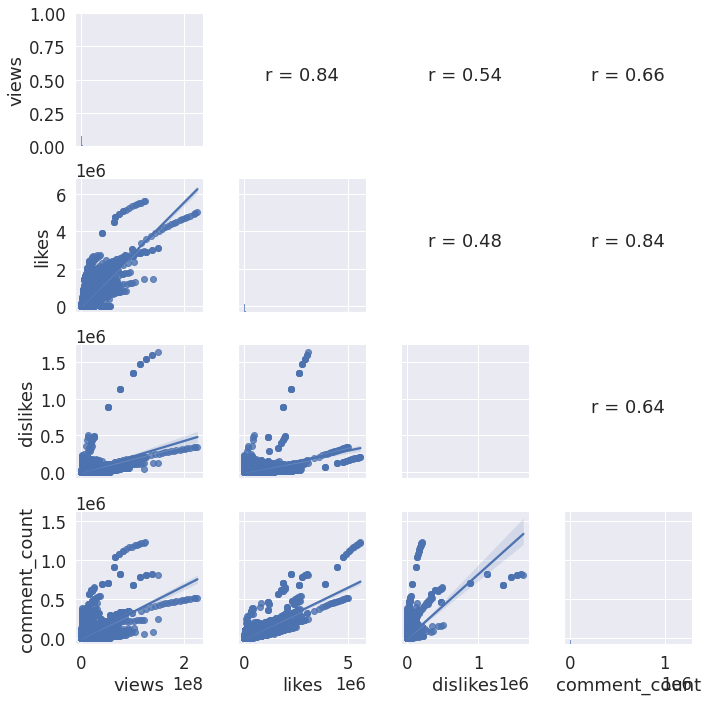

In [107]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
    ax = plt.gca()
    r,p = pearsonr(x,y)
    ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
    ax.set_axis_off()

# iris = sns.load_dataset("iris")x/
g = sns.PairGrid(df_correlation.toPandas())
g.map_diag(sns.histplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)

In [108]:
old_combined_sparkDF.show(2)

+-----------+-------------------+--------------------+---------------+-----------+-------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+-------+----------------+
|   video_id|      trending_date|               title|  channel_title|category_id|       publish_time|                tags|  views|likes|dislikes|comment_count|      thumbnail_link|comments_disabled|ratings_disabled|video_error_or_removed|         description|country|        category|
+-----------+-------------------+--------------------+---------------+-----------+-------------------+--------------------+-------+-----+--------+-------------+--------------------+-----------------+----------------+----------------------+--------------------+-------+----------------+
|kzwfHumJyYc|2017-11-14 00:00:00|Sharry Mann: Cute...|Lokdhun Punjabi|          1|2017-11-12 12:20:39|"sharry mann|""sh...|1096327|33966|     

In [89]:
import pyspark.sql.functions as F
from pyspark.sql.types import IntegerType

# recall the views_log have been renamed as label 
needed_columns =  ['likes', 'dislikes', 'comment_count', 'views', 'country']
class_correlation_frame = old_combined_sparkDF
class_correlation_frame = class_correlation_frame.select([i for i in class_correlation_frame.columns if i in needed_columns])



class_frame = class_correlation_frame.withColumn("views", F.col("views").astype(IntegerType()))\
.withColumn("likes", F.col("likes").astype(IntegerType()))\
.withColumn("dislikes", F.col("dislikes").astype(IntegerType()))\
.withColumn("comment_count", F.col("comment_count").astype(IntegerType()))


class_frame.printSchema()


root
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- country: string (nullable = true)



In [110]:
needed_columns =  ['likes', 'dislikes', 'comment_count', 'views', 'country']
copied_pd_frame_2 = copied_pd_frame.copy()

copied_pd_frame_2.drop([col for col in copied_pd_frame_2.columns if col not in needed_columns],axis=1,inplace=True)

copied_pd_frame_2.head()

,views,likes,dislikes,comment_count,country
video_id,,,,,
kzwfHumJyYc,1096327,33966,798,882,IN
zUZ1z7FwLc8,590101,735,904,0,IN
10L1hZ9qa58,473988,2011,243,149,IN
N1vE8iiEg64,1242680,70353,1624,2684,IN
kJzGH0PVQHQ,464015,492,293,66,IN


In [111]:
copied_pd_frame_2.country = pd.Categorical(copied_pd_frame_2.country)
copied_pd_frame_2['country_code'] = copied_pd_frame_2.country.cat.codes
copied_pd_frame_2.head()

,views,likes,dislikes,comment_count,country,country_code
video_id,,,,,,
kzwfHumJyYc,1096327,33966,798,882,IN,2
zUZ1z7FwLc8,590101,735,904,0,IN,2
10L1hZ9qa58,473988,2011,243,149,IN,2
N1vE8iiEg64,1242680,70353,1624,2684,IN,2
kJzGH0PVQHQ,464015,492,293,66,IN,2


In [112]:
final_data = copied_pd_frame_2.drop(columns=['country'])
final_data.to_csv('final_data.csv')

# feature_cols = ['views', 'likes', 'dislikes', 'country_code',]


In [113]:
final_sparkDF = spark.read.options(header='True', inferSchema='True').csv('final_data.csv')
final_sparkDF.show()
final_sparkDF.printSchema()

+-----------+--------+------+--------+-------------+------------+
|   video_id|   views| likes|dislikes|comment_count|country_code|
+-----------+--------+------+--------+-------------+------------+
|kzwfHumJyYc| 1096327| 33966|     798|          882|           2|
|zUZ1z7FwLc8|  590101|   735|     904|            0|           2|
|10L1hZ9qa58|  473988|  2011|     243|          149|           2|
|N1vE8iiEg64| 1242680| 70353|    1624|         2684|           2|
|kJzGH0PVQHQ|  464015|   492|     293|           66|           2|
|il_pSa5l98w| 6106669| 98612|    4185|         4763|           2|
|7MxiQ4v0EnE| 5718766|127477|    7134|         8063|           2|
|c64I9HNpiOY|10588371|132738|    8812|        10847|           2|
|KObFEYCaRx8|  118223|   520|      53|           23|           2|
|g8QsfJhFpjY|  969030| 59798|    1545|         2404|           2|
|4du1KXBl4YU|  632747|  4330|    2183|         2869|           2|
|zOOmEDwPJX0| 2348107| 32834|     710|         1743|           2|
|Prb_osSVE

In [114]:
final_sparkDF = final_sparkDF.dropna()


In [115]:
final_sparkDF = final_sparkDF.withColumn("ratio", final_sparkDF.likes / final_sparkDF.views) 
final_sparkDF.show()

+-----------+--------+------+--------+-------------+------------+--------------------+
|   video_id|   views| likes|dislikes|comment_count|country_code|               ratio|
+-----------+--------+------+--------+-------------+------------+--------------------+
|kzwfHumJyYc| 1096327| 33966|     798|          882|           2|0.030981632304960108|
|zUZ1z7FwLc8|  590101|   735|     904|            0|           2|0.001245549490680409|
|10L1hZ9qa58|  473988|  2011|     243|          149|           2|0.004242723444475387|
|N1vE8iiEg64| 1242680| 70353|    1624|         2684|           2| 0.05661393118099591|
|kJzGH0PVQHQ|  464015|   492|     293|           66|           2|0.001060310550305...|
|il_pSa5l98w| 6106669| 98612|    4185|         4763|           2|0.016148247104927415|
|7MxiQ4v0EnE| 5718766|127477|    7134|         8063|           2| 0.02229099774321943|
|c64I9HNpiOY|10588371|132738|    8812|        10847|           2|0.012536205994293174|
|KObFEYCaRx8|  118223|   520|      53|     

In [143]:
from pyspark.sql import functions as f
final_sparkDF_2 = final_sparkDF.withColumn('popularity_index', f.when(f.col('ratio') >= 0.04, 1)
.otherwise(0))

final_sparkDF_2.show()

+-----------+--------+------+--------+-------------+------------+--------------------+----------------+
|   video_id|   views| likes|dislikes|comment_count|country_code|               ratio|popularity_index|
+-----------+--------+------+--------+-------------+------------+--------------------+----------------+
|kzwfHumJyYc| 1096327| 33966|     798|          882|           2|0.030981632304960108|               0|
|zUZ1z7FwLc8|  590101|   735|     904|            0|           2|0.001245549490680409|               0|
|10L1hZ9qa58|  473988|  2011|     243|          149|           2|0.004242723444475387|               0|
|N1vE8iiEg64| 1242680| 70353|    1624|         2684|           2| 0.05661393118099591|               1|
|kJzGH0PVQHQ|  464015|   492|     293|           66|           2|0.001060310550305...|               0|
|il_pSa5l98w| 6106669| 98612|    4185|         4763|           2|0.016148247104927415|               0|
|7MxiQ4v0EnE| 5718766|127477|    7134|         8063|           2

In [165]:
draft_sparkDF_2 = final_sparkDF_2.drop('ratio')
draft_sparkDF_2 = draft_sparkDF_2.drop('video_id')
draft_sparkDF_2 = draft_sparkDF_2.drop('country_code')

draft_sparkDF_2.show()

+--------+------+--------+-------------+----------------+
|   views| likes|dislikes|comment_count|popularity_index|
+--------+------+--------+-------------+----------------+
| 1096327| 33966|     798|          882|               0|
|  590101|   735|     904|            0|               0|
|  473988|  2011|     243|          149|               0|
| 1242680| 70353|    1624|         2684|               1|
|  464015|   492|     293|           66|               0|
| 6106669| 98612|    4185|         4763|               0|
| 5718766|127477|    7134|         8063|               0|
|10588371|132738|    8812|        10847|               0|
|  118223|   520|      53|           23|               0|
|  969030| 59798|    1545|         2404|               1|
|  632747|  4330|    2183|         2869|               0|
| 2348107| 32834|     710|         1743|               0|
|  156085|   716|      53|            0|               0|
|  472413|  2611|     250|          174|               0|
|  836006| 244

In [167]:
cols_2 = draft_sparkDF_2.columns
print(cols_2)

['views', 'likes', 'dislikes', 'comment_count', 'popularity_index']


In [168]:
from pyspark.ml.feature import OneHotEncoder, StringIndexer, VectorAssembler
stages = []
label_stringIdx = StringIndexer(inputCol = 'popularity_index', outputCol = 'label')
stages += [label_stringIdx]
numericCols = ['views', 'likes', 'dislikes', 'comment_count']
assemblerInputs =  numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

In [169]:
from pyspark.ml import Pipeline
pipeline_new = Pipeline(stages = stages)
pipelineModel_new = pipeline_new.fit(draft_sparkDF_2)
draft_sparkDF_2 = pipelineModel_new.transform(draft_sparkDF_2)
selectedCols = ['label', 'features'] + cols_2
draft_sparkDF_2 = draft_sparkDF_2.select(selectedCols)
draft_sparkDF_2.printSchema()

root
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)
 |-- views: integer (nullable = true)
 |-- likes: integer (nullable = true)
 |-- dislikes: integer (nullable = true)
 |-- comment_count: integer (nullable = true)
 |-- popularity_index: integer (nullable = false)



In [170]:
draft_sparkDF_2.show()

+-----+--------------------+--------+------+--------+-------------+----------------+
|label|            features|   views| likes|dislikes|comment_count|popularity_index|
+-----+--------------------+--------+------+--------+-------------+----------------+
|  0.0|[1096327.0,33966....| 1096327| 33966|     798|          882|               0|
|  0.0|[590101.0,735.0,9...|  590101|   735|     904|            0|               0|
|  0.0|[473988.0,2011.0,...|  473988|  2011|     243|          149|               0|
|  1.0|[1242680.0,70353....| 1242680| 70353|    1624|         2684|               1|
|  0.0|[464015.0,492.0,2...|  464015|   492|     293|           66|               0|
|  0.0|[6106669.0,98612....| 6106669| 98612|    4185|         4763|               0|
|  0.0|[5718766.0,127477...| 5718766|127477|    7134|         8063|               0|
|  0.0|[1.0588371E7,1327...|10588371|132738|    8812|        10847|               0|
|  0.0|[118223.0,520.0,5...|  118223|   520|      53|           2

In [171]:
draft_train_sdf_new, draft_test_sdf_new = draft_sparkDF_2.randomSplit([0.8, 0.2], seed = 2021)
print("Training Dataset Count: " + str(draft_train_sdf_new.count()))
print("Test Dataset Count: " + str(draft_test_sdf_new.count()))

Training Dataset Count: 123402
Test Dataset Count: 31165


In [172]:
from pyspark.ml.classification import GBTClassifier
gbt_new = GBTClassifier(maxIter=10)
gbtModel_new = gbt.fit(draft_train_sdf_new)
predictions_new = gbtModel.transform(draft_test_sdf_new)



In [180]:
predictions_new.filter('popularity_index == 1').show()

+-----+--------------------+-----+-----+--------+-------------+----------------+--------------------+--------------------+----------+
|label|            features|views|likes|dislikes|comment_count|popularity_index|       rawPrediction|         probability|prediction|
+-----+--------------------+-----+-----+--------+-------------+----------------+--------------------+--------------------+----------+
|  1.0|[385.0,40.0,0.0,3.0]|  385|   40|       0|            3|               1|[0.95940998440671...|[0.87200678708417...|       0.0|
|  1.0|[412.0,23.0,0.0,0.0]|  412|   23|       0|            0|               1|[0.95940998440671...|[0.87200678708417...|       0.0|
|  1.0|[898.0,124.0,2.0,...|  898|  124|       2|           12|               1|[-0.0648483787542...|[0.46762118557807...|       1.0|
|  1.0|[917.0,85.0,25.0,...|  917|   85|      25|            0|               1|[0.95940998440671...|[0.87200678708417...|       0.0|
|  1.0|[1000.0,46.0,19.0...| 1000|   46|      19|            0

In [128]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.9905911575570592
